# Final Project
## Topic

In today’s world, we strive to create communities and institutions that allow us to feel comfortable and hope-fully happy. We explore the contributing factors thatdetermine if women enjoy more or less equality inthe countries with the happiest and unhappiest people.  This work aggregates data from economic, social, and cultural perspectives to perform this analysis. Ultimately, our goal is to examine existing happiness metrics based on life evaluation and see how they correspond to the equality and well-being of women indifferent countries.

## Imports

In [1]:
!pip install pycountry
!pip install pygal_maps_world
!pip install cairosvg

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

import pycountry

from PIL import Image 

# Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls drive/MyDrive/Final\ Project

 2015.csv
 2016.csv
 2017.csv
 2018.csv
 2019.csv
 2020.csv
 annual_coal_consumption_by_country_1980_2009_2.csv
 best_countries_for_women.csv
 best_countries_for_women_us_news.csv
 best_countries_for_women_us_news.xlsx
 data3.csv
'Final Project.ipynb'
'Gallup 2017 Global Emotions report.pdf'
 unodc_crime_statistics_2014.xlsx
 What_Happiness_Today_Tells_Us_About_The_World_Tomorrow_Report.pdf
 whr_aggregated.csv
 WHR_women_2020.csv
 WHR_women_2020.xlsx
 World_Bank_Gender_Stats.xlsx
 World_Bank_Governance.xls
 World_Bank_Jobs.xlsx
 World_Bank_Migration.xls
 World_Bank_Nutrition_Population.xls
 world_development_report_2013_job_info.xls


In [5]:
data_dir = 'drive/MyDrive/Final Project/'

whr2015 = pd.read_csv(data_dir + "2015.csv")
whr2016 = pd.read_csv(data_dir + "2016.csv")
whr2017 = pd.read_csv(data_dir + "2017.csv")
whr2018 = pd.read_csv(data_dir + "2018.csv")
whr2019 = pd.read_csv(data_dir + "2019.csv")
whr2020 = pd.read_csv(data_dir + "2020.csv")

whr2015.head() 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
# Confirm these all share columns
world_happiness_reports = [whr2015,whr2016,whr2017,whr2018,whr2019,whr2020]

# collect columns names
total_set = set(world_happiness_reports[0].columns)
for whr in world_happiness_reports:
  total_set.union( set(whr.columns) )

shared_set = total_set
for i, whr in enumerate(world_happiness_reports):
  print(i + 2015, '->' , list(whr.columns) ) 
  shared_set = shared_set.intersection(set(whr.columns))

print('\nAll Columns', sorted(total_set) )
print('Shared Columns', sorted(shared_set) )

2015 -> ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016 -> ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017 -> ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018 -> ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019 -> ['Overall rank', 'Country or region', 'Score', 'GDP per capita', '

In [7]:
# Shared Columns
cols_to_keep = ["rank","country","score",
                "gdp_per_capita","healthy_life_expectancy",
                "freedom_of_choice","generosity","corruption_perceptions"]


In [8]:
# 2015
whr2015.drop(["Region",'Standard Error', 'Family', 'Dystopia Residual'],axis=1,inplace=True)
whr2015.columns = ["country", "rank", "score", "gdp_per_capita",
"healthy_life_expectancy", "freedom_of_choice", "corruption_perceptions",
"generosity"]

whr2015 = whr2015.loc[:,cols_to_keep].copy()
whr2015["year"] = 2015
#whr2015.head()

In [9]:
# 2016
whr2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            "Family",'Dystopia Residual'],axis=1,inplace=True)
whr2016.columns = ["country","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_of_choice","corruption_perceptions","generosity"]

whr2016 = whr2016.loc[:,cols_to_keep].copy()
whr2016["year"] = 2016
#whr2016.head()

In [10]:
# 2017
whr2017.drop(["Whisker.high","Whisker.low",
            "Family","Dystopia.Residual"],axis=1,inplace=True)
whr2017.columns =  ["country","rank","score",
                  "gdp_per_capita","healthy_life_expectancy",
                 "freedom_of_choice","generosity","corruption_perceptions"]

whr2017 = whr2017.loc[:,cols_to_keep].copy()
whr2017["year"] = 2017
#whr2017.head()

In [11]:
# 2018
whr2018.columns = ["rank","country","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_of_choice","generosity","corruption_perceptions"]
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

whr2018 = whr2018.loc[:,cols_to_keep].copy()
whr2018["year"] = 2018
#whr2018.head()

In [12]:
# 2019
whr2019.columns = ["rank","country","score",
                  "gdp_per_capita","social_support","healthy_life_expectancy",
                 "freedom_of_choice","generosity","corruption_perceptions"]

whr2019 = whr2019.loc[:,cols_to_keep].copy()
whr2019["year"] = 2019
#whr2019.head()

In [13]:
# 2020 custom parsing

if "upperwhisker" in whr2020.columns:
  whr2020.drop(["Regional indicator","upperwhisker","lowerwhisker","Dystopia + residual",
                'Standard error of ladder score','Social support', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 
                'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                'Explained by: Generosity', 'Explained by: Perceptions of corruption'],axis=1,inplace=True)

# get rank from score
if 'Ladder score' in whr2020.columns:
  whr2020['rank'] = whr2020['Ladder score'].rank(ascending=False).astype('int32')

# Rename columns
whr2020.columns = ["country",'score','gdp_per_capita',"healthy_life_expectancy",
                   "freedom_of_choice","generosity","corruption_perceptions","rank"]

whr2020 = whr2020.loc[:,cols_to_keep].copy()
whr2020["year"] = 2020
#whr2020.head()

In [14]:
# Merge Data
whr = whr2015.append([whr2016,whr2017,whr2018,whr2019,whr2020])
print(len(whr),'rows captured')
whr.head()

935 rows captured


,rank,country,score,gdp_per_capita,healthy_life_expectancy,freedom_of_choice,generosity,corruption_perceptions,year
0,1,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2015


In [15]:
# Read and clean data
gender_df = pd.read_excel(data_dir + 'World_Bank_Gender_Stats.xlsx', sheet_name=0)
gender_df = gender_df.drop(columns=['Series Code', '2020 [YR2020]'])
gender_df = gender_df.dropna(subset=['Series Name'])
gender_df = gender_df[gender_df['Series Name'] != 'Data from database: Gender Statistics']
gender_df = gender_df[gender_df['Series Name'] != 'Last Updated: 10/08/2020']

# Change to Alpha 2 country codes
def alpha_3_to_alpha_2(alpha_3):
  country = pycountry.countries.get(alpha_3=alpha_3)
  if country: return country.alpha_2
  else: return ''
gender_df['country_code'] = gender_df['Country Code'].apply(lambda x: alpha_3_to_alpha_2(x))

# Fix NaN entries
gender_df = gender_df.replace('..', np.nan)

gender_df

,Series Name,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],country_code
0,A woman can apply for a passport in the same w...,Afghanistan,AFG,1.0,1.0,1.0,1.0,AF
1,A woman can apply for a passport in the same w...,Albania,ALB,1.0,1.0,1.0,1.0,AL
2,A woman can apply for a passport in the same w...,Algeria,DZA,0.0,0.0,0.0,0.0,DZ
3,A woman can apply for a passport in the same w...,American Samoa,ASM,NaN,NaN,NaN,NaN,AS
4,A woman can apply for a passport in the same w...,Andorra,AND,NaN,NaN,NaN,NaN,AD
...,...,...,...,...,...,...,...,...
164107,"Youth illiterate population, 15-24 years, fema...",West Bank and Gaza,PSE,3355.0,NaN,3054.0,NaN,PS
164108,"Youth illiterate population, 15-24 years, fema...",World,WLD,58662185.0,57169096.0,55666564.0,NaN,
164109,"Youth illiterate population, 15-24 years, fema...","Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,YE
164110,"Youth illiterate population, 15-24 years, fema...",Zambia,ZMB,NaN,NaN,151649.0,NaN,ZM


In [16]:
ignore_series = [' Q1',' Q2',' Q3',' Q4',' Q5']
unique_series = [series for series in gender_df['Series Name'].unique() if all(q not in series for q in ignore_series)]

print(len(unique_series), 'unique questions, some samples below:\n')
unique_series[:20]

479 unique questions, some samples below:



['A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
 'A woman can be head of household in the same way as a man (1=yes; 0=no)',
 'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
 'A woman can get a job in the same way as a man (1=yes; 0=no)',
 'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
 'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
 'A woman can register a business in the same way as a man (1=yes; 0=no)',
 'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
 'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
 'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
 'A woman has the same rights to remarry as a man (1=yes; 0=no)',
 'Access to anti-retroviral drugs, female (%)',
 'Access to anti-retroviral drugs, male (%)',
 'Account ownership at a financial institution or with a mobile-money-service pro

# Data Exploration

### Aggregated World Happiness Data

In [17]:
code_corrections = {'South Korea':'KR','North Cyprus':'CY','Northern Cyprus':'CY','Laos':'LA','Swaziland':'SZ','Congo (Kinshasa)':'CD',
                    'Congo (Brazzaville)':'CG','Ivory Coast':'CI','Taiwan Province of China':'TW',
                    'Hong Kong S.A.R., China':'HK', 'Palestinian Territories':'PS','Trinidad & Tobago':'TT',
                    'Somaliland region':'SO', 'Hong Kong S.A.R. of China':'HK', 'Somaliland Region':'SO',
                    'Venezuela':'VE', 'Taiwan':'TW', 'Czech Republic':'CZ', 'Bolivia':'BO', 'Russia':'RU',
                    'Macedonia':'MK', 'Kosovo':'XK', 'Vietnam':'VN', 'Moldova':'MD', 'Iran':'IR',
                    'Tanzania':'TZ', 'Syria':'SY', 'Panama':'PA', 'Columbia':'CO'}

def to_country_code(row):
  row_country = row['country']
  try:
    return pycountry.countries.get(name=row_country).alpha_2
  except:
    return code_corrections.get(row_country,"")
  

whr['country_code'] = whr.apply(to_country_code, axis=1)
whr

,rank,country,score,gdp_per_capita,healthy_life_expectancy,freedom_of_choice,generosity,corruption_perceptions,year,country_code
0,1,Switzerland,7.5870,1.396510,0.941430,0.665570,0.296780,0.419780,2015,CH
1,2,Iceland,7.5610,1.302320,0.947840,0.628770,0.436300,0.141450,2015,IS
2,3,Denmark,7.5270,1.325480,0.874640,0.649380,0.341390,0.483570,2015,DK
3,4,Norway,7.5220,1.459000,0.885210,0.669730,0.346990,0.365030,2015,NO
4,5,Canada,7.4270,1.326290,0.905630,0.632970,0.458110,0.329570,2015,CA
...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.4759,6.625160,45.200001,0.640881,0.082410,0.891807,2020,CF
149,150,Rwanda,3.3123,7.600104,61.098846,0.900589,0.055484,0.183541,2020,RW
150,151,Zimbabwe,3.2992,7.865712,55.617260,0.711458,-0.072064,0.810237,2020,ZW
151,152,South Sudan,2.8166,7.425360,51.000000,0.451314,0.016519,0.763417,2020,SS


### Where the top ranked countries are located

Happiest Countries According to the WHR in 2020 by Decile


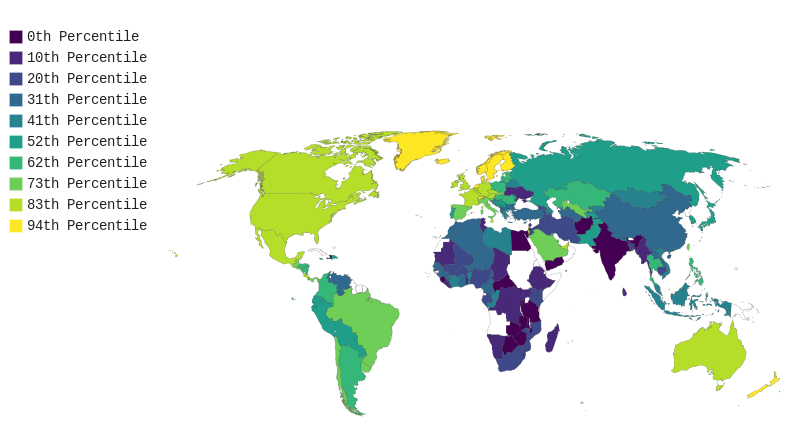

In [18]:
# import pygal library 
from pygal_maps_world.maps import World
from pygal.style import Style
from pylab import *

# Create a color map
cmap = cm.get_cmap('viridis', 10) 
colors = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

# Apply Color Map and Transparency
custom_style = Style(
  background='transparent', plot_background='transparent', opacity='1',
  colors=(colors))

# All Countries
latest_rankings = whr[whr['year']==2020]
top_countries= latest_rankings[['country','country_code','rank','score']]

# Create a dictionary of dict[country code] = happiness score
score_dict = pd.Series(top_countries['score'].values,index=top_countries['country_code'].str.lower()).to_dict()

# Greenland is part of Denmark
score_dict['gl'] = score_dict.get('dk')
  
# Create a world map http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html
worldmap = World(interpolate='cubic', style=custom_style)
  
# set the title of the map 
print('Happiest Countries According to the WHR in 2020 by Decile')

# cut into deciles
sorted_countries = [k for k, v in sorted(score_dict.items(), key=lambda item: item[1])]
groups = 16 
for i in range(0, len(sorted_countries), groups):
  grouping = sorted_countries[i:i + groups]
  #title = f'{grouping[0].upper()}-{grouping[-1].upper()}'
  percentile = int((i/len(sorted_countries)) * 100)
  title = f'{percentile}th Percentile'
  worldmap.add(title, grouping) 

# adding the countries 
#worldmap.add('Happiness Score', score_dict) 
  
# save into the file 
png_filename = 'happiest_countries.png'
worldmap.render_to_png(png_filename) 

# Open the cropped image
im = Image.open(png_filename) 
im.crop((0, 0, 785, 425)) # left, top, right, bottom

Here are the World Happiness Reports happiest countries split at the 10th percentile with New Zealand (NZ) - Finland (FI) being the best performing group and Afganistan (AF) - Egypt (EG) the lowest performing. 

Note: There are some missing countries due to lack of data on the part of the WHR for 2020

We notice that most of the top ranked countries exist in northern Europe. We cannot see a single country in Africa, the Americas, or Asia in the top 10.

### Explore the Stability of Rankings Over Time

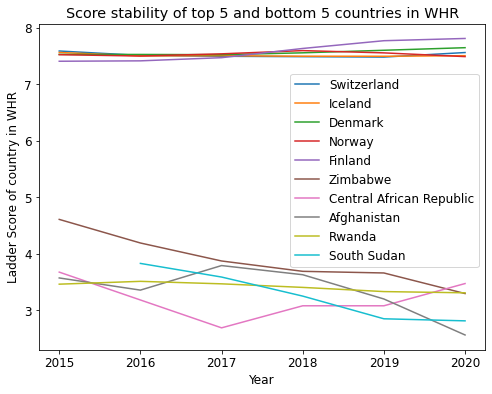

In [19]:
# Top 5 and Bottom 5 Countries

whr_score_stability = whr[['score', 'year', 'country']]

latest_rankings = whr[whr['year']==2020]
top_countries = latest_rankings.head(5)['country']
bottom_countries = latest_rankings.tail(5)['country']
countries = top_countries.append(bottom_countries)

whr_score_specific_countries_stability = whr_score_stability.loc[whr_score_stability['country'].isin(countries)]

plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=whr_score_specific_countries_stability, x='year', y='score', hue='country', ax=ax)
plt.legend(bbox_to_anchor=(0.55,0.55))
plt.ylabel('Ladder Score of country in WHR')
plt.xlabel('Year')
plt.title('Score stability of top 5 and bottom 5 countries in WHR')

plt.show()

We can observe immeditately that countries that place at the top consistently stay at the top whereas countries towards the bottom show greater variance.

In [20]:
whr_score_variance = whr_score_stability[['country','score']].groupby(by="country",as_index=False).agg([np.mean,np.std])
# Source: https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns/55757002
whr_score_variance.columns = ['_'.join(tup).rstrip('_') for tup in whr_score_variance.columns.values] 
whr_score_variance = whr_score_variance.reset_index()
whr_score_variance.sort_values(by=['score_mean'],ascending=False)

,country,score_mean,score_std
46,Finland,7.582950,0.179534
38,Denmark,7.562600,0.050201
113,Norway,7.532167,0.038845
147,Switzerland,7.519483,0.043739
62,Iceland,7.509917,0.025413
...,...,...,...
0,Afghanistan,3.355150,0.438653
148,Syria,3.292200,0.233573
140,South Sudan,3.269320,0.446822
26,Central African Republic,3.202580,0.383731


Here we can immediately begin to see that the countries that typically score towards the top enjoy much smaller standard deviations in the scores than countries at the bottom. Let's explore further and see if this is prevailing trend.

-0.506 Correlation Between Standard Deviation of Rank and Mean Rank with p-value of 5.596500544417113e-12



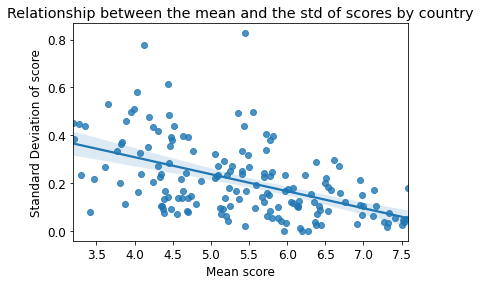

In [21]:
mean_scores = whr_score_variance['score_mean']
std_scores = whr_score_variance['score_std']

# Correlation and p-value
whr_score_variance_clean = whr_score_variance.dropna()
corr, p_val = stats.pearsonr(whr_score_variance_clean['score_mean'], whr_score_variance_clean['score_std'])
print(f"{round(corr,3)} Correlation Between Standard Deviation of Rank and Mean Rank with p-value of {p_val}\n");

sns.regplot(x=mean_scores, y=std_scores);
plt.ylabel('Standard Deviation of score')
plt.xlabel('Mean score')
plt.title("Relationship between the mean and the std of scores by country")
plt.show();

Here our suspicions have been confirmed and we see that countries that rank at the bottom seem to experience greater turbulence which in turn keeps their rankings in flux.

### Where are the world's largest economies ranked?

0.775 Correlation Between Standard Deviation of Rank and Mean Rank with p-value of 5.983050790573e-32



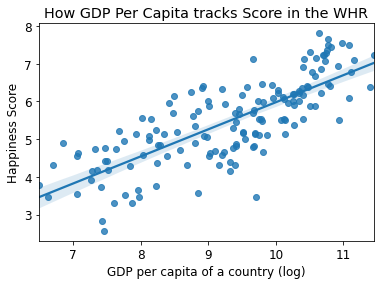

In [22]:
whr_2020 = whr[whr['year'] == 2020]

# Correlation and p-value
whr_2020_clean = whr_2020.dropna()
corr, p_val = stats.pearsonr(whr_2020_clean['gdp_per_capita'], whr_2020_clean['score'])
print(f"{round(corr,3)} Correlation Between Standard Deviation of Rank and Mean Rank with p-value of {p_val}\n");

sns.regplot(data=whr_2020, x='gdp_per_capita', y='score')
plt.xlabel('GDP per capita of a country (log)')
plt.ylabel('Happiness Score')
plt.title('How GDP Per Capita tracks Score in the WHR')
plt.show()

There is a very strong correlation between GDP Per Capita and the happiness score given to a country by the World Happiness Report.

### How much explanatory power do the other WHR features have?

In [23]:
correlation_df = whr[whr['year'] == 2020].drop(['year'], axis=1)
correlation_df['rank'] = correlation_df['rank'] * -1 # flip
correlation_df['corruption_perceptions'] = correlation_df['corruption_perceptions'] * -1 # flip

correlations = correlation_df.corr(method='pearson');
correlation_df.describe()

,rank,score,gdp_per_capita,healthy_life_expectancy,freedom_of_choice,generosity,corruption_perceptions
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,-77.000000,5.47324,9.295706,64.445529,0.783360,-0.014568,-0.733120
std,44.311398,1.11227,1.201588,7.057848,0.117786,0.151809,0.175172
min,-153.000000,2.56690,6.492642,45.200001,0.396573,-0.300907,-0.935585
25%,-115.000000,4.72410,8.350645,58.961712,0.714839,-0.127015,-0.849151
50%,-77.000000,5.51500,9.456313,66.305145,0.799805,-0.033665,-0.783122
75%,-39.000000,6.22850,10.265124,69.289192,0.877709,0.085429,-0.683019
max,-1.000000,7.80870,11.450681,76.804581,0.974998,0.560664,-0.109784


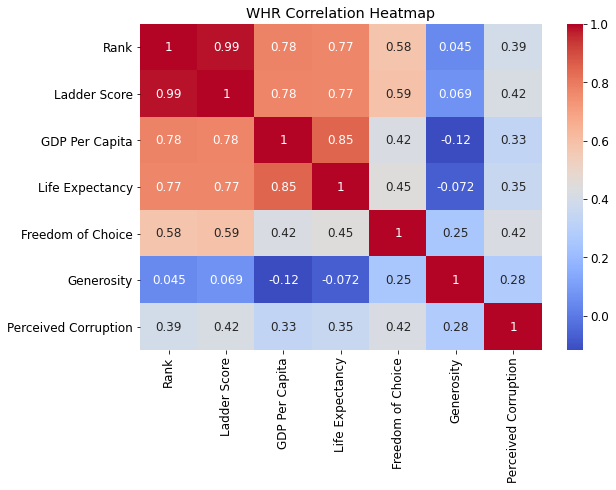

In [24]:
# Create a (truncated) heat map

# Create a mask using official documentation code
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

labels = ['Rank','Ladder Score','GDP Per Capita','Life Expectancy','Freedom of Choice','Generosity','Perceived Corruption']

f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(correlations,
  cmap='coolwarm',
#  mask=mask,
  xticklabels=labels,
  yticklabels=labels,
  annot=True);
ax.set_title('WHR Correlation Heatmap')
plt.show()

Examining **Rank** we see that GDP Per Capita and Healthy Life Expectancy have very strong correlations of around 0.78 for each. Generosity seemingly has the lowest explaining power for the rank of a country in terms of happiness at a correlation of only 0.045.

Examining **GDP Per Capita** we note that Healthy Life Expectance is strongly correlated, which makes sense as higher GDP can likely increase access to medical professionals and technology.

### Examining A Subset of Countries
We narrow our analysis to countries from US New's Ranking of Happiness for Women since countries at the top of the ranking show very little variance in their performance on the WHR. The US News data lists the best countries for women to live in, based on a survey of 9,800 women. Source: https://www.usnews.com/news/best-countries/best-women

In [25]:
# This data was scraped and refined from US News data
best_for_women = pd.read_csv(data_dir + "best_countries_for_women.csv")
best_for_women.columns = ['country','rank_women','country_code']

# Add in women's rankings
whr_women = pd.merge(whr, best_for_women[['rank_women','country_code']], on='country_code')

# Only keep the 2020 entries
whr_women = whr_women[whr_women['year']==2020]

In [26]:
# Codes for filtering

# All codes
all_codes = list(best_for_women['country_code'])

# Cut down to a subset of the countries, shying away from the top where they are very homogenous
best_for_women_codes = list(best_for_women[best_for_women['rank_women'] % 2 == 0].tail(30)['country_code'])

# G20 Nations
g20_codes = ['CA', 'AU', 'GB', 'DE', 'US', 'FR', 'MX', 'SA', 'IT', 'BR', 'AR', 'KR', 'RU', 'ID', 'TR', 'CN', 'ZA', 'IN']

# European Union Nations
eu_codes = ['FI', 'DK', 'NL', 'SE', 'AT', 'LU', 'DE', 'CZ', 'FR', 'ES', 'IT', 'SI', 'SK', 'LT', 'PL', 'RO', 'EE', 'LV', 'PT', 'BY', 'GR', 'HR']

# Europe
europe_codes = ['FI', 'DK', 'CH', 'NO', 'NL', 'SE', 'AT', 'LU', 'DE', 'GB',  'CZ', 'FR', 'ES', 'IT', 'SI', 'SK', 'LT', 'PL', 'RO', 'EE', 'LV', 'PT', 'BY', 'GR', 'HR', 'RS', 'RU', 'BG', 'UA']

# Latin America
latin_codes = ['BR', 'CL', 'CO', 'AR', 'EC', 'PE', 'BO', 'MX', 'PA', 'CR', 'DO']

# Union of South American Nations
usan_codes = ['BR', 'CL', 'CO', 'AR', 'EC', 'PE', 'BO']

women_df = whr_women[whr_women['country_code'].isin(all_codes)].reset_index(drop=True)
women_df.sort_values('rank')

,rank,country,score,gdp_per_capita,healthy_life_expectancy,freedom_of_choice,generosity,corruption_perceptions,year,country_code,rank_women
4,1,Finland,7.8087,10.639267,71.900825,0.949172,-0.059482,0.195445,2020,FI,6
1,2,Denmark,7.6456,10.774001,72.402504,0.951444,0.066202,0.168489,2020,DK,1
0,3,Switzerland,7.5599,10.979933,74.102448,0.921337,0.105911,0.303728,2020,CH,7
2,5,Norway,7.4880,11.087804,73.200783,0.955750,0.134533,0.263218,2020,NO,4
5,6,Netherlands,7.4489,10.812712,72.300919,0.908548,0.207612,0.364717,2020,NL,3
...,...,...,...,...,...,...,...,...,...,...,...
61,128,Tunisia,4.3922,9.314973,66.897858,0.593362,-0.216414,0.867590,2020,TN,73
68,130,Sri Lanka,4.3270,9.389970,67.200066,0.837634,0.081130,0.859002,2020,LK,54
67,133,Myanmar,4.3080,8.680482,58.961712,0.895075,0.560664,0.645124,2020,MM,71
70,138,Egypt,4.1514,9.316542,61.780151,0.708354,-0.196878,0.787727,2020,EG,59


The Sampled Countries


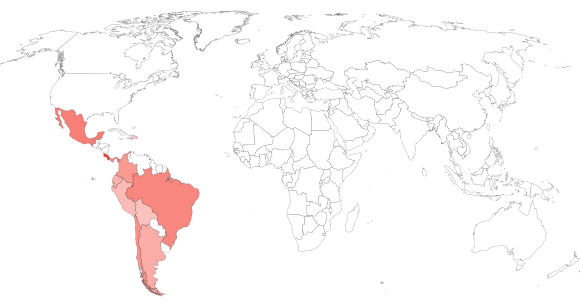

In [27]:
# Plot sampled countries
women_df = whr_women[whr_women['country_code'].isin(latin_codes)].reset_index(drop=True)

# Create a dictionary of dict[country code] = happiness score
score_dict = pd.Series(women_df['score'].values,index=women_df['country_code'].str.lower()).to_dict()
  
# create a world map 
worldmap = World()
  
# set the title of the map 
print('The Sampled Countries')
  
# adding the countries 
worldmap.add('Happiness Score', score_dict) 
  
# save into the file 
png_filename = 'sampled_countries.png'
worldmap.render_to_png(png_filename) 

# Open the cropped image
im = Image.open(png_filename) 

im.crop((305, 260, 410, 425)) # left, top, right, bottom # usan
im.crop((425, 130, 540, 240)) # left, top, right, bottom # eu
im.crop((200, 120, 780, 425)) # left, top, right, bottom # whole map

# Examining Women's Equality in these Countries

In [28]:
# Helper Functions

# List cols from 2016-2020 
years = [f'{year} [YR{year}]' for year in range(2016,2020)]

def cols_to_df(cols):

  # Filter on relevant series
  df = gender_df[gender_df['Series Name'].isin(cols)].copy(deep=True)

  # Average yearly data and drop yearly data
  df['mean_result'] = df[years].mean(axis=1)

  # For every feature calculate the mean of each feature
  for col in cols:
    # Calculate 
    col_mean_result = df[df['Series Name'] == col]['mean_result']
    avg_col_val = round(col_mean_result.mean(),3)
    max_col_val = col_mean_result.max()
    min_col_val = col_mean_result.min()
    range_col_val = max_col_val - min_col_val
    print(col, 'min', min_col_val, 'mean', avg_col_val, 'max', max_col_val)

    # Set missing values to the median
    df.loc[(df['Series Name'] == col) & (df['mean_result'].isnull()), 'mean_result'] = col_mean_result.median()
    
    # Normalize mean_result against ALL countries
    df.loc[df['Series Name'] == col, 'mean_result'] -= min_col_val 
    df.loc[df['Series Name'] == col, 'mean_result'] /= range_col_val 
    
  print()  

  return df

def invert_percent(row, col_name):
  if row['Series Name'] == col_name: return 1 - row['mean_result']
  return row['mean_result']

def report_results(equality_df, country_codes, task):
  # Combine Scores  
  equality_scores = equality_df.groupby(by='country_code').mean().reset_index()

  # Filter on given codes
  women_df = whr_women[whr_women['country_code'].isin(country_codes)].reset_index(drop=True)

  # Merge in rankings and scores to gender data 
  equality_scores_avg = pd.merge(equality_scores, women_df, on='country_code')

  # Calculate Correlations
  # whr_corr = equality_scores_avg['mean_result'].corr(equality_scores_avg['score'])
  # usnews_corr = equality_scores_avg['mean_result'].corr(equality_scores_avg['rank_women']) * -1
  # print(f'Correlation between WHR Score and Women\'s {task} = {whr_corr}')
  # print(f'Correlation between US News Rank and Women\'s {task} = {usnews_corr}')

  # p-value calculations
  equality_scores_avg_clean = equality_scores_avg#.dropna()
  whr_corr, whr_pval = stats.pearsonr(equality_scores_avg_clean['mean_result'], equality_scores_avg_clean['score'])
  usnews_corr, usnews_pval = stats.spearmanr(equality_scores_avg_clean['mean_result'], equality_scores_avg_clean['rank_women'])
  usnews_corr = usnews_corr * -1 # Since rank 1 is the highest
  print(f'{round(whr_corr,4)} Correlation between WHR Score and Women\'s {task}, w/ p-value of {whr_pval}')
  print(f'{round(usnews_corr,4)} Correlation between US News Rank and Women\'s {task}, w/ p-value of {usnews_pval}')

  # Report Results
  #print('From',len(equality_scores_avg),'countries')
  print(equality_scores_avg_clean[['country','mean_result','score','rank_women']].sort_values('mean_result'))
  

# Code to do correlation by year
# for year in [2016, 2017, 2018, 2019]:
#   freedom_travel_scores_year = freedom_travel_scores[['country_code',f'{year} [YR{year}]']]
#   freedom_travel_scores_year = pd.merge(freedom_travel_scores_year, whr_women[whr_women['year']==year], on='country_code')
#   corr = freedom_travel_scores_year[f'{year} [YR{year}]'].corr(freedom_travel_scores_year['score'])
#   print('WHR score to Travel correlation 2016-2019 =', corr)

### Freedom Equality

In [29]:
travel_cols = [
  'A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
  'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
  'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
  'A woman can choose where to live in the same way as a man (1=yes; 0=no)'
]

marriage_cols = [
  #'Age at first marriage, female',
  #'Age at first marriage, male'
  'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
  'A woman has the same rights to remarry as a man (1=yes; 0=no)',
  'There is no legal provision that requires a married woman to obey her husband (1=yes; 0=no)'
]

body_cols = [
  'Contraceptive prevalence, any methods (% of women ages 15-49)',
  'Contraceptive prevalence, modern methods (% of women ages 15-49)',
  'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
  'A woman has the same rights to remarry as a man (1=yes; 0=no)',
  'There is no legal provision that requires a married woman to obey her husband (1=yes; 0=no)'
  "Decision maker about a woman's own health care: mainly husband (% of women age 15-49)",
  #"Decision maker about a woman's own health care: other (% of women age 15-49)",
  #"Decision maker about a woman's own health care: someone else (% of women age 15-49)",
  #"Decision maker about a woman's own health care: mainly wife (% of women age 15-49)",
  #"Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)",
]

household_cols = [
  'A woman can be head of household in the same way as a man (1=yes; 0=no)',
  'Decision maker about major household purchases: mainly husband (% of women age 15-49)',
  #'Decision maker about major household purchases: mainly wife (% of women age 15-49)',
  #'Decision maker about major household purchases: other (% of women age 15-49)',
  #'Decision maker about major household purchases: someone else (% of women age 15-49)',
  'Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)'
]

finance_cols = [
  'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
  'A woman can register a business in the same way as a man (1=yes; 0=no)',
  'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
  'Female and male surviving spouses have equal rights to inherit assets (1=yes; 0=no)',
  'The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)',
  'Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)',
  'Female and male surviving spouses have equal rights to inherit assets (1=yes; 0=no)'
]

freedom_cols = travel_cols + marriage_cols + body_cols + household_cols + finance_cols

In [30]:
# Overall Freedom to...
task = "Freedom Equality"

# Change columns into a usable DataFrame
equality_df = cols_to_df(freedom_cols)

# Pre Process
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Decision maker about a woman's own health care: mainly husband (% of women age 15-49)"), axis=1)

# Report Results
report_results(equality_df, all_codes, task)

A woman can apply for a passport in the same way as a man (1=yes; 0=no) min 0.0 mean 0.795 max 1.0
A woman can travel outside her home in the same way as a man (1=yes; 0=no) min 0.0 mean 0.911 max 1.0
A woman can travel outside the country in the same way as a man (1=yes; 0=no) min 0.0 mean 0.948 max 1.0
A woman can choose where to live in the same way as a man (1=yes; 0=no) min 0.0 mean 0.803 max 1.0
A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no) min 0.0 mean 0.746 max 1.0
A woman has the same rights to remarry as a man (1=yes; 0=no) min 0.0 mean 0.619 max 1.0
There is no legal provision that requires a married woman to obey her husband (1=yes; 0=no) min 0.0 mean 0.894 max 1.0
Contraceptive prevalence, any methods (% of women ages 15-49) min 9.8 mean 47.777 max 84.5
Contraceptive prevalence, modern methods (% of women ages 15-49) min 3.7 mean 41.337 max 80.5
A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no) min 0.0 mean 0.

### Achievement Equality

In [31]:
# Education
# 'Adjusted net enrollment rate, primary, male (% of primary school age children)',
# 'Children out of school, primary, male',
# "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
# "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)",
# 'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)',
# 'Expected Years of School, Male',
# 'Expected years of schooling, male',
# 'Literacy rate, adult male (% of males ages 15 and above)',

# Job Opportunity
# 'Employment to population ratio, ages 15-24, male (%) (national estimate)',
# 'Share of male business owners  (% of total business owners)',
# 'Share of male directors (% of total directors)',

# Property Ownership
# 'Women who own a house alone (% of women age 15-49)',
# 'Women who own a house jointly (% of women age 15-49)',
# 'Women who own land alone (% of women age 15-49)',
# 'Women who own land jointly (% of women age 15-49)',

In [32]:
task = "Achievement Equality"
equality_cols = [
'Adjusted net enrollment rate, primary, female (% of primary school age children)',
'Children out of school, primary, female',
"Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
"Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)",
'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)',
'Expected Years of School, Female',
'Expected years of schooling, female',
'Literacy rate, adult female (% of females ages 15 and above)',

'A woman can get a job in the same way as a man (1=yes; 0=no)',
'Employment to population ratio, ages 15-24, female (%) (national estimate)',
'Law prohibits discrimination in employment based on gender (1=yes; 0=no)',
'Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no)',
'The mandatory retirement age for men and women are equal (1=yes; 0=no)',
'Share of female business owners (% of total business owners)',
'Share of female directors (% of total directors)'
'Proportion of seats held by women in national parliaments (%)',

'Women who do not own a house (% of women age 15-49)',
'Women who do not own land (% of women age 15-49)',
'Women who own a house both alone and jointly (% of women age 15-49)',
'Women who own land both alone and jointly (% of women age 15-49)',
]

# Change columns into a usable DataFrame
equality_df = cols_to_df(equality_cols)

# Pre Process
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Children out of school, primary, female"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Women who do not own a house (% of women age 15-49)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Women who do not own land (% of women age 15-49)'), axis=1)

# Report Results
report_results(equality_df, all_codes, task)

Adjusted net enrollment rate, primary, female (% of primary school age children) min 44.71462 mean 88.767 max 99.65002
Children out of school, primary, female min 62.0 mean 2438299.912 max 31175000.0
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) min 0.469980001449585 mean 19.397 max 44.46086502075195
Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative) min 0.0452900007367134 mean 6.424 max 28.343870162963903
Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative) min 0.0 mean 0.46 max 2.61791503429413
Expected Years of School, Female min 3.73311891555786 mean 11.272 max 13.9203205108643
Expected years of schooling, female min 5.640860080718995 mean 14.085 max 22.221206665039066
Literacy rate, adult female (% of females ages 15 and above) min 13.9552297592163 mean 79.286 max 99.98213958740234
A woman can get a job in the same way as a man (1=yes; 0=no) min 0.0

### Health Equality

In [33]:
# Access to Medicine
# 'Access to anti-retroviral drugs, male (%)',

# Equality of Health Outcomes
# 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)',
# 'Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)',
# 'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)',
# 'Mortality rate attributed to unintentional poisoning, female (per 100,000 female population)',
# 'Mortality rate attributed to unintentional poisoning, male (per 100,000 male population)',

# Drug Use and Mental Health
# 'Smoking prevalence, males (% of adults)',
# 'Suicide mortality rate, male (per 100,000 male population)',

# Equality of Health Condition
# 'Prevalence of HIV, male (% ages 15-24)',
# 'Prevalence of obesity, female (% of female population ages 18+)',
# 'Prevalence of obesity, male (% of male population ages 18+)',
# 'Prevalence of overweight, female (% of female adults)',
# 'Prevalence of overweight, male (% of male adults)',
# 'Prevalence of overweight, weight for height, female (% of children under 5)',
# 'Prevalence of overweight, weight for height, male (% of children under 5)',
# 'Prevalence of severe wasting, weight for height, male (% of children under 5)',
# 'Prevalence of stunting, height for age, female (% of children under 5)',
# 'Prevalence of stunting, height for age, male (% of children under 5)',
# 'Prevalence of underweight, weight for age, female (% of children under 5)',
# 'Prevalence of underweight, weight for age, male (% of children under 5)',
# 'Prevalence of wasting, weight for height, male (% of children under 5)',

In [34]:
task = "Health Equality"
equality_cols = [
'Access to anti-retroviral drugs, female (%)',
'Contraceptive prevalence, any methods (% of women ages 15-49)',
'Contraceptive prevalence, modern methods (% of women ages 15-49)'

'Births attended by skilled health staff (% of total)',
'Pregnant women receiving prenatal care (%)',
'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)',

'Smoking prevalence, females (% of adults)',
'Suicide mortality rate, female (per 100,000 female population)',

"Women's share of population ages 15+ living with HIV (%)",
'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
'Prevalence of HIV, female (% ages 15-24)',
'Prevalence of severe wasting, weight for height, female (% of children under 5)',
'Prevalence of wasting, weight for height, female (% of children under 5)',
]

# Change columns into a usable DataFrame
equality_df = cols_to_df(equality_cols)

# Pre Process
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Suicide mortality rate, female (per 100,000 female population)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Women's share of population ages 15+ living with HIV (%)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Prevalence of anemia among women of reproductive age (% of women ages 15-49)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Prevalence of HIV, female (% ages 15-24)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Prevalence of severe wasting, weight for height, female (% of children under 5)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Prevalence of stunting, height for age, female (% of children under 5)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Prevalence of underweight, weight for age, female (% of children under 5)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Prevalence of wasting, weight for height, female (% of children under 5)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Smoking prevalence, females (% of adults)'), axis=1)

# Report Results
report_results(equality_df, all_codes, task)

Access to anti-retroviral drugs, female (%) min 6.75 mean 56.3 max 90.75
Contraceptive prevalence, any methods (% of women ages 15-49) min 9.8 mean 47.777 max 84.5
Contraceptive prevalence, modern methods (% of women ages 15-49)Births attended by skilled health staff (% of total) min nan mean nan max nan
Pregnant women receiving prenatal care (%) min 51.6 mean 88.776 max 99.6
Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) min 4.7 mean 16.14 max 32.6
Smoking prevalence, females (% of adults) min 0.1 mean 10.236 max 44.0
Suicide mortality rate, female (per 100,000 female population) min 0.5 mean 5.09 max 24.4
Women's share of population ages 15+ living with HIV (%) min 6.0 mean 43.872 max 72.875
Prevalence of anemia among women of reproductive age (% of women ages 15-49) min 9.1 mean 30.005 max 69.6
Prevalence of HIV, female (% ages 15-24) min 0.1 mean 1.043 max 14.05
Prevalence of severe wasting, weight for height, female (% of children under 5) min

### Cultural Equality

In [35]:
# Abuse of Women
# 'Proportion of women who have sought help to stop physical or sexual violence (% of women age 15-49)',

# Matriarchial
# 'Female headed households (% of households with a female head)',

# Disparity as children
# 'Children in employment, male (% of male children ages 7-14)',
# 'Children out of school, primary, male'

In [36]:
# Freedom to Cultural Independence
task = "Cultural Equality"
equality_cols = [
'Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no)',
'Female genital mutilation prevalence (%)',
'There is legislation specifically addressing domestic violence (1=yes; 0=no)',
'There is legislation on sexual harassment in employment (1=yes; 0=no)',
'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)',
'Proportion of women who have ever experienced any form of sexual violence (% of women age 15-49)',
'Proportion of women who have ever experienced intimate partner violence (% of women age 15-49)',

'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',

'Children in employment, female (% of female children ages 7-14)',
'Children out of school, primary, female',
]

# Change columns into a usable DataFrame
equality_df = cols_to_df(equality_cols)

# Pre Process
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Female genital mutilation prevalence (%)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Proportion of women who have ever experienced any form of sexual violence (% of women age 15-49)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Proportion of women who have ever experienced intimate partner violence (% of women age 15-49)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, "Children in employment, female (% of female children ages 7-14)"), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)'), axis=1)
equality_df['mean_result'] = equality_df.apply(lambda x: invert_percent(x, 'Children out of school, primary, female'), axis=1)

# Report Results
report_results(equality_df, g20_codes, task)

Criminal penalties or civil remedies exist for sexual harassment in employment (1=yes; 0=no) min 0.0 mean 0.671 max 1.0
Female genital mutilation prevalence (%) min 0.3 mean 40.303 max 95.65
There is legislation specifically addressing domestic violence (1=yes; 0=no) min 0.0 mean 0.787 max 1.0
There is legislation on sexual harassment in employment (1=yes; 0=no) min 0.0 mean 0.712 max 1.0
Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of women age 15-49) min 3.5 mean 17.508 max 34.6
Proportion of women who have ever experienced any form of sexual violence (% of women age 15-49) min 0.9 mean 10.49 max 28.2
Proportion of women who have ever experienced intimate partner violence (% of women age 15-49) min 8.1 mean 28.472 max 57.1
Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day) min 14.5250208 mean 16.329 max 22.1457084
Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day) min 3.125 